In [1]:
from datascience import *
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [7]:
gameData = Table().read_table('game data.csv')
gameData

Unnamed: 0,True Count,Player Hand,Upcard,Final Player Hand,Final Dealer Hand,Result
0,0,"['2', '4']",10,"['2', '4']","['10', 'A']",Lose
1,0.513158,"['4', '5']",5,"['4', '5', '8']","['5', '8', '10']",Doubled Win
2,0.348993,"['6', '10']",10,"['6', '10']","['10', '6', '6']",Win
3,0.887372,"['6', '5']",10,"['6', '5', '10']","['10', '6', '10']",Doubled Win
4,0,"['10', '10']",A,"['10', '10']","['A', '9']",Push
5,0,"['9', 'A']",3,"['9', 'A']","['3', '8', '3', '7']",Lose
6,0,"['8', '7']",10,"['8', '7', '10']","['10', '7']",Lose
7,0.191176,"['5', '9']",6,"['5', '9']","['6', '9', '2']",Lose
8,0.58427,"['5', '8']",4,"['5', '8']","['4', '10', '6']",Lose
9,0.793893,"['3', '8']",10,"['3', '8', '4']","['10', '7']",Doubled Lose


In [8]:
def roundCount(count, precision = 1):
    return (1 / precision) * round(precision * count)

def resultToEV(result):
    if 'Lose' in result:
        output = -1
    elif 'Push' in result:
        output = 0
    elif 'Win' in result:
        output = 1
    elif 'Blackjack' in result:
        output = 3/2
    else:
        raise Exception(f'that shit {result} is not a result')
    if 'Doubled' in result:
        output *= 2
    return output

def averageEV(results):
    return np.mean(np.array([resultToEV(result) for result in results]))

gameDataEV = gameData.with_column('Rounded True Count', gameData.apply(roundCount, 'True Count'))
counts = gameDataEV.group('Rounded True Count').column('count')
gameDataEV = gameDataEV.select('Rounded True Count', 'Result').group('Rounded True Count', averageEV).with_column('Count', counts)
filteredGameDataEV = gameDataEV.where('Rounded True Count', are.between(-8, 8))
filteredGameDataEV

Rounded True Count,Result averageEV,Count
-8,0.00431881,5094
-7,-0.0146939,11059
-6,0.00564094,24464
-5,0.0019004,48674
-4,-0.000530146,97143
-3,0.00838229,186226
-2,0.0146976,356758
-1,0.0202838,688504
0,0.00872493,1042243
1,0.00601913,660311


In [12]:
playerHands = gameData.group('Player Hand')
playerHands

Player Hand,count
"['10', '10']",348015
"['10', '2']",88963
"['10', '3']",88860
"['10', '4']",88649
"['10', '5']",88715
"['10', '6']",89190
"['10', '7']",88629
"['10', '8']",89112
"['10', '9']",87949
"['10', 'A']",88911


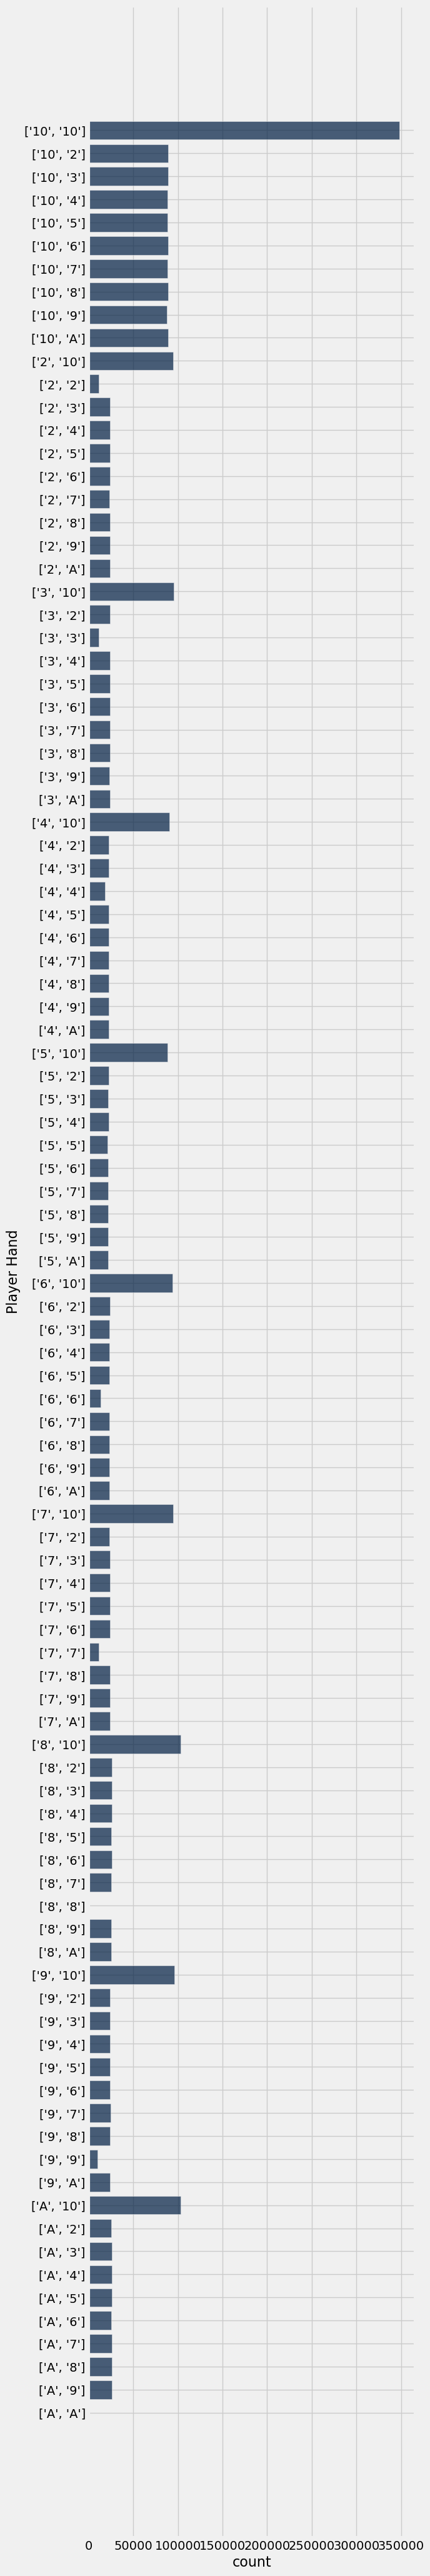

In [13]:
playerHands.barh('Player Hand')

In [14]:
upcards = gameData.select('Upcard', 'Result')
upcardEV = upcards.group('Upcard', averageEV)
upcardEV

Upcard,Result averageEV
10,-0.138024
2,0.0895745
3,0.115721
4,0.145758
5,0.17742
6,0.20967
7,0.163597
8,0.0837874
9,-0.00537847
A,-0.308133


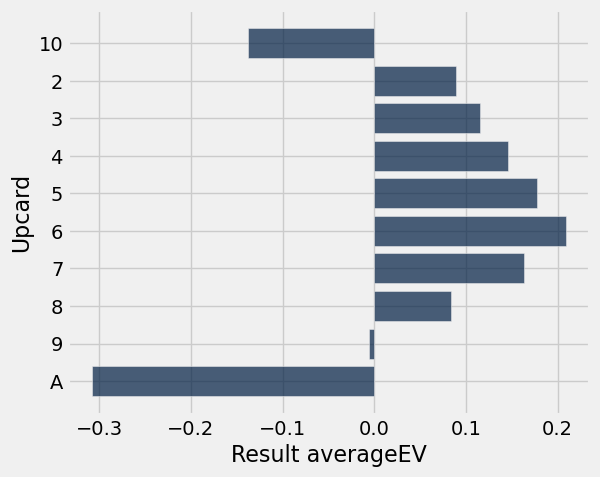

In [15]:
upcardEV.barh('Upcard')

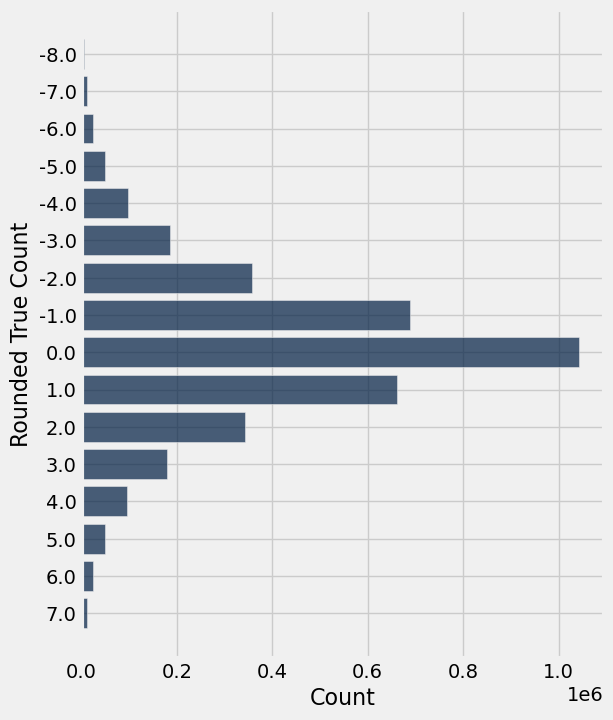

In [9]:
filteredGameDataEV.barh('Rounded True Count', 'Count')

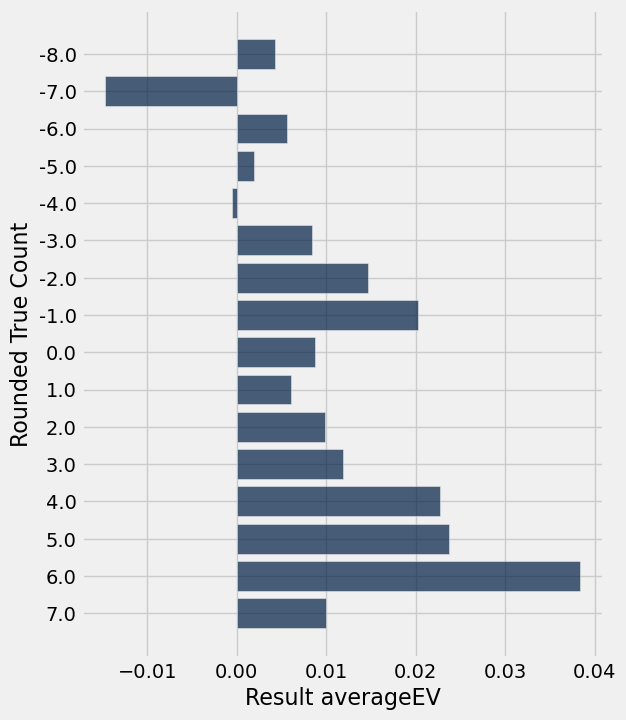

In [10]:
filteredGameDataEV.barh('Rounded True Count', 'Result averageEV')